# Internet Movie Database
##### Die Internet Movie Database ist eine Datenbank, die Informationen zu Filmen, Fernsehserien, Videoproduktionen und  Computerspielen verzeichnet, außerdem zu den Personen, die in diesen mitgewirkt haben. Die Datenbank ist seit 1990 online und gehört zu Amazon, außerdem umfasst sie mehr als 18 Millionen Einträge. Im Folgenden werde ich das Datenset „title.basics.tsv.gz“ nutzen, um einige Informationen zu analysieren und zu visualisieren. Das Datenset enthält Titelinformationen, zum Beispiel Angaben zum Populären Titel, dem Originaltitel, das Genre oder das Veröffentlichungsjahr. Als erstes importiere ich die nötigen Daten und lasse sie mir tabellarisch anzeigen, um zu sehen, welche möglichen Fragestellungen sich daraus ableiten lassen.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
url = "https://datasets.imdbws.com/title.basics.tsv.gz"

In [8]:
imdb = pd.read_csv(url, sep="\t", dtype={'isAdult': 'str', 'startYear': 'str', 'endYear': 'str'})

In [9]:
imdb.shape

(8265931, 9)

In [10]:
imdb

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"
...,...,...,...,...,...,...,...,...,...
8265926,tt9916848,tvEpisode,Episode #3.17,Episode #3.17,0,2010,\N,\N,"Action,Drama,Family"
8265927,tt9916850,tvEpisode,Episode #3.19,Episode #3.19,0,2010,\N,\N,"Action,Drama,Family"
8265928,tt9916852,tvEpisode,Episode #3.20,Episode #3.20,0,2010,\N,\N,"Action,Drama,Family"
8265929,tt9916856,short,The Wind,The Wind,0,2015,\N,27,Short


##### Bei den angegebenen Informationen stellen sich mir direkt einige Fragen, welche ich gerne genauer untersuchen möchte. Zunächst interessiert mich die Entwicklung der Anzahl der Film-/Serienproduktionen der letzten Jahre. Meine Hypothese ist, dass die Veröffentlichungszahlen kontinuierlich ansteigen, aber wahrscheinlich in 2020/2021 Corona bedingt einen Einbruch der Veröffentlichungszahlen aufweisen werden. Deswegen lasse ich mir zunächst die Veröffentlichungen pro Jahr tabellarisch ausgeben. Um es aber übersichtlicher nachzuvollziehen, werden nur die letzten 20 Jahre im Diagramm dargestellt.

In [68]:
years = {}
for year in sorted(list(imdb.startYear)):
  amount = years.get(year, 0)
  years[year] = amount + 1

In [69]:
years

{'1874': 1,
 '1877': 1,
 '1878': 2,
 '1881': 2,
 '1882': 1,
 '1883': 1,
 '1885': 1,
 '1887': 45,
 '1888': 5,
 '1889': 2,
 '1890': 6,
 '1891': 10,
 '1892': 9,
 '1893': 3,
 '1894': 99,
 '1895': 115,
 '1896': 851,
 '1897': 1363,
 '1898': 1796,
 '1899': 1818,
 '1900': 1860,
 '1901': 1767,
 '1902': 1808,
 '1903': 2676,
 '1904': 1837,
 '1905': 1704,
 '1906': 1861,
 '1907': 2489,
 '1908': 4283,
 '1909': 5434,
 '1910': 6412,
 '1911': 7709,
 '1912': 8724,
 '1913': 9773,
 '1914': 9348,
 '1915': 8572,
 '1916': 7055,
 '1917': 5621,
 '1918': 4739,
 '1919': 4147,
 '1920': 4536,
 '1921': 4229,
 '1922': 3602,
 '1923': 3041,
 '1924': 3095,
 '1925': 3391,
 '1926': 3404,
 '1927': 3520,
 '1928': 3501,
 '1929': 3652,
 '1930': 3191,
 '1931': 3293,
 '1932': 3080,
 '1933': 2915,
 '1934': 2991,
 '1935': 2907,
 '1936': 3362,
 '1937': 3591,
 '1938': 3427,
 '1939': 3038,
 '1940': 2623,
 '1941': 2500,
 '1942': 2417,
 '1943': 2206,
 '1944': 2042,
 '1945': 2055,
 '1946': 2563,
 '1947': 2966,
 '1948': 3651,
 '1949': 

<AxesSubplot:>

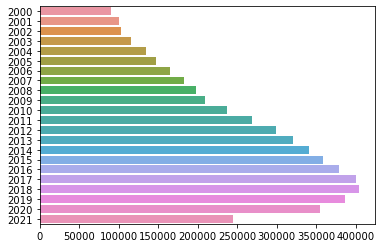

In [70]:
table = {'title': list(years.keys())[-30:-8], 'amount': list(years.values())[-30:-8]}
sns.barplot(y="title", x="amount", data=table)

##### Die Wachstumskurve verzeichnet einen kontinuierlichen Anstieg vom Jahr 2000 – 2018. Entgegen meiner Erwartungen fallen die Zahlen bereits im Jahr 2019 rapide ab und sinken bis 2021 weiter. Ob Corona für den Fall im Jahr 2019 verantwortlich ist, lässt sich nicht sagen, aber es ist auf jeden Fall spannend zu sehen wie rasant sich diese Branche in den letzten zwei Jahrzehnten entwickelt hat. Anfang der 2000er lag die jährliche Veröffentlichung von Film- oder Serienproduktionen bei knapp 90.000 pro Jahr, während es 2018 um die 400.000 waren.

##### Des Weiteren hat mich interessiert welches Genre am stärksten in der IMDb vertreten ist. Eine konkrete Prognose konnte ich nicht treffen, aber fand es einfach spannend. Deswegen ließ ich mir zunächst die Genres in einer Liste ausgeben. Dort waren die Zahlen aber sehr nichts aussagend, weswegen ich eine visualisierte Ansicht hilfreicher fand, um die Zahlen miteinander zu vergleichen. Aus der Abbildung geht hervor, dass das Genre „Drama“ am stärksten vertreten ist. Das zweit häufigste Genre ist „Comedy“.  

In [33]:
genres = {}
for line in imdb.genres:
  for genre in str(line).split(','):
    amount = genres.get(genre, 0)
    genres[genre] = amount + 1  

In [32]:
list(genres.items())

[('Documentary', 769343),
 ('Short', 1026945),
 ('Animation', 408958),
 ('Comedy', 1664684),
 ('Romance', 729038),
 ('Sport', 180005),
 ('News', 531638),
 ('Drama', 2265980),
 ('Fantasy', 175165),
 ('Horror', 147186),
 ('Biography', 88182),
 ('Music', 396940),
 ('War', 29902),
 ('Crime', 353323),
 ('Western', 27947),
 ('Family', 576165),
 ('Adventure', 327684),
 ('Action', 335863),
 ('History', 115937),
 ('Mystery', 163283),
 ('\\N', 643495),
 ('Sci-Fi', 97045),
 ('Musical', 63520),
 ('Thriller', 135126),
 ('Film-Noir', 764),
 ('Talk-Show', 908931),
 ('Game-Show', 255791),
 ('Reality-TV', 427905),
 ('Adult', 245259),
 ('nan', 10)]

In [27]:
table = {'title': list(genres.keys()), 'amount': list(genres.values())}

<AxesSubplot:>

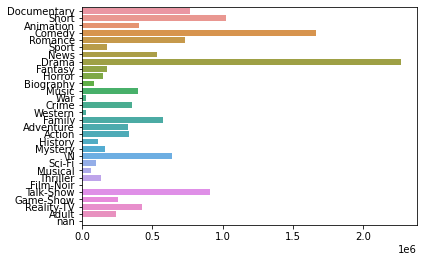

In [28]:
sns.barplot(y="title", x="amount", data=table)

##### Als letztes hat mich interessiert, wie das Verhältnis zwischen den verschiedenen Erscheinungsformen ist. Überwiegen Filme, was der Titel der Datenbank suggeriert oder liegt ein anderes Format vorne? Daraufhin habe ich zunächst einmal festgestellt welche Formate in der IMDb vorliegen. Danach welche wie oft vorhanden sind. Die Visualisierung war in diesem Fall nicht so einfach, da eine Erscheinungsform viel mehr Einträge hatte, als die anderen, sodass die Darstellung sehr schwer zu lesen war. Demnach wurde das Diagramm „frisiert“, um leichter ablesen zu können welches wie viele Einträge hat. Es stellt aber eine verzerrte Wirklichkeit dar, da die Abstände geringer wirken als sie sind - ist aber eine gute Ergänzung zur Liste. Über die meisten Einträge verfügt das Format „TV Episoden“, dies macht auch Sinn, da Serien viele einzelne Folgen haben und so diese Filme klar überwiegen. 

In [60]:
set(imdb.titleType)

{'movie',
 'radioEpisode',
 'radioSeries',
 'short',
 'tvEpisode',
 'tvMiniSeries',
 'tvMovie',
 'tvPilot',
 'tvSeries',
 'tvShort',
 'tvSpecial',
 'video',
 'videoGame'}

In [61]:
titleTypes = {}
for titleType in sorted(list(imdb.titleType)):
  amount = titleTypes.get(titleType, 0)
  titleTypes[titleType] = amount + 1

In [62]:
titleTypes

{'movie': 587868,
 'radioEpisode': 1,
 'radioSeries': 1,
 'short': 830821,
 'tvEpisode': 6064777,
 'tvMiniSeries': 39733,
 'tvMovie': 132943,
 'tvPilot': 1,
 'tvSeries': 214762,
 'tvShort': 10276,
 'tvSpecial': 34151,
 'video': 321383,
 'videoGame': 29214}

<AxesSubplot:>

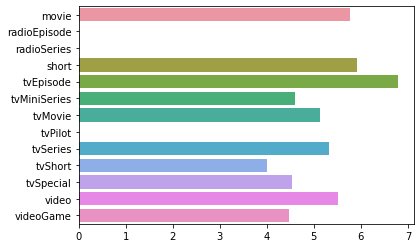

In [75]:
import math
table = {'title': list(titleTypes.keys()), 'amount': [math.log(number, 10) for number in titleTypes.values()]}
sns.barplot(y="title", x="amount", data=table)

##### Abschließend lässt sich sagen, dass sich mit Python aus einem einzigen Datenset viel mehr Informationen filtern lassen als gedacht. Diese haben konkrete Fragen beantworten können und Rückschlüsse auf Entwicklungen geben können. Python bietet viele Möglichkeiten in der Analyse und Auswertung von Daten und ist ein sehr nützliches Tool.